#**1.Introduction**

The dfset includes elements of the acquisition of an outcome established on recruitment based on gender, age, and estimated salary.



#**2. Method**


The analysis follows the steps as below.




#**3.EDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/DS_Prod/December /Campus Recruitment/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.drop(['ssc_b','hsc_b','sl_no'], axis=1, inplace=True)

In [ ]:
df["gender"] = df.gender.map({"M":0,"F":1})
df["hsc_s"] = df.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
df["degree_t"] = df.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [ ]:
df.isnull().sum()

gender             0
ssc_p              0
hsc_p              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
salary_mean = df['salary'].mean()
df.fillna(salary_mean,inplace=True)
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,1,270000.000000
1,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,1,200000.000000
2,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,1,250000.000000
3,0,56.00,52.00,1,52.00,1,0,66.0,0,59.43,0,288655.405405
4,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,0,77.60,0,0,91.0,1,74.49,1,400000.000000
211,0,58.00,60.00,1,72.00,1,0,74.0,1,53.62,1,275000.000000
212,0,67.00,67.00,0,73.00,0,1,59.0,1,69.72,1,295000.000000
213,1,74.00,66.00,0,58.00,0,0,70.0,0,60.23,1,204000.000000


In [ ]:
df.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
print(df.shape)

(215, 12)


In [ ]:
df.describe()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,66.333163,0.525581,66.370186,0.376744,0.344186,72.100558,0.558140,62.278186,0.688372,288655.405405
std,0.479168,10.827205,10.897509,0.594403,7.358743,0.581987,0.476211,13.275956,0.497767,5.833385,0.464240,77457.900102
min,0.000000,40.890000,37.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,200000.000000
25%,0.000000,60.600000,60.900000,0.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,250000.000000
50%,0.000000,67.000000,65.000000,0.000000,66.000000,0.000000,0.000000,71.000000,1.000000,62.000000,1.000000,288655.405405
75%,1.000000,75.700000,73.000000,1.000000,72.000000,1.000000,1.000000,83.500000,1.000000,66.255000,1.000000,288655.405405
max,1.000000,89.400000,97.700000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


In [ ]:
df.corr()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
gender,1.000000,0.068969,0.021334,0.033729,0.173217,0.006157,-0.085153,-0.084294,-0.106160,0.300531,-9.067040e-02,-1.291073e-01
ssc_p,0.068969,1.000000,0.511472,0.012464,0.538404,0.119835,0.175675,0.261993,0.172536,0.388478,6.078887e-01,2.357072e-02
hsc_p,0.021334,0.511472,1.000000,-0.245795,0.434206,-0.140902,0.141025,0.245113,0.241630,0.354823,4.912279e-01,5.450558e-02
hsc_s,0.033729,0.012464,-0.245795,1.000000,-0.038386,0.559610,0.067800,-0.009518,-0.080070,0.043186,-4.717932e-02,-1.442790e-02
degree_p,0.173217,0.538404,0.434206,-0.038386,1.000000,-0.042024,0.122648,0.224470,0.218286,0.402364,4.798610e-01,-1.414817e-02
degree_t,0.006157,0.119835,-0.140902,0.559610,-0.042024,1.000000,0.086342,0.012734,-0.116289,0.068707,-8.229395e-02,1.017490e-01
workex,-0.085153,0.175675,0.141025,0.067800,0.122648,0.086342,1.000000,0.056735,0.191174,0.168811,2.760600e-01,1.184562e-01
etest_p,-0.084294,0.261993,0.245113,-0.009518,0.224470,0.012734,0.056735,1.000000,0.236315,0.218055,1.276394e-01,1.528286e-01
specialisation,-0.106160,0.172536,0.241630,-0.080070,0.218286,-0.116289,0.191174,0.236315,1.000000,0.105728,2.506551e-01,1.174086e-01
mba_p,0.300531,0.388478,0.354823,0.043186,0.402364,0.068707,0.168811,0.218055,0.105728,1.000000,7.692165e-02,1.463245e-01


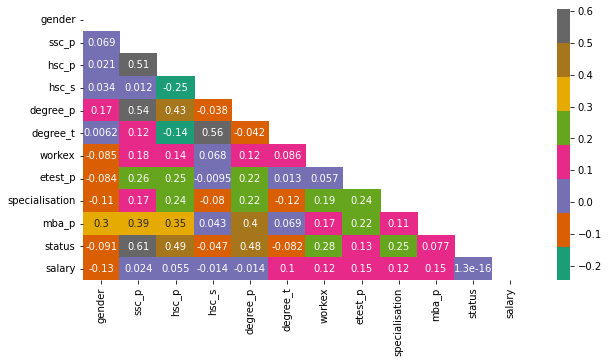

In [ ]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

In [ ]:
df['salary'].unique()

array([270000.        , 200000.        , 250000.        , 288655.40540541,
       425000.        , 252000.        , 231000.        , 260000.        ,
       218000.        , 300000.        , 236000.        , 265000.        ,
       393000.        , 360000.        , 240000.        , 350000.        ,
       278000.        , 320000.        , 411000.        , 287000.        ,
       204000.        , 450000.        , 216000.        , 220000.        ,
       268000.        , 275000.        , 336000.        , 230000.        ,
       500000.        , 400000.        , 210000.        , 420000.        ,
       380000.        , 280000.        , 276000.        , 940000.        ,
       225000.        , 233000.        , 690000.        , 340000.        ,
       255000.        , 285000.        , 290000.        , 650000.        ,
       264000.        , 295000.        ])

#**4. Analyze**

In [ ]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,1,270000.000000
1,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,1,200000.000000
2,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,1,250000.000000
3,0,56.00,52.00,1,52.00,1,0,66.0,0,59.43,0,288655.405405
4,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,1,425000.000000


In [ ]:
x = df.iloc[:,:-2]
y = df.iloc[:,-2]
x.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80
1,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28
2,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80
3,0,56.00,52.00,1,52.00,1,0,66.0,0,59.43
4,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[-0.73943397, -0.02808697,  2.2688123 , ..., -1.29109087,
        -1.12390297, -0.59764672],
       [-0.73943397,  1.11336869,  1.10344799, ...,  1.08715679,
         0.88975652,  0.6876202 ],
       [-0.73943397, -0.21323793,  0.15331275, ...,  0.21890765,
         0.88975652, -0.76947385],
       ...,
       [-0.73943397, -0.02808697,  0.06133451, ..., -0.98909117,
         0.88975652,  1.27870553],
       [ 1.35238581,  0.61994138, -0.03064373, ..., -0.15859198,
        -1.12390297, -0.35193393],
       [-0.73943397, -0.49096436, -0.76646966, ...,  1.27590661,
        -1.12390297, -0.3536522 ]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

#4.1 First model Prediction Algorithms:


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    
    return model

##*1. KNN Alogrithm*

---



In [ ]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.88
Testing Accuracy : 0.8307692307692308


              precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.83      0.96      0.89        45

    accuracy                           0.83        65
   macro avg       0.84      0.75      0.78        65
weighted avg       0.83      0.83      0.82        65



##*2. Logistic Regression Alogrithm*

---



In [ ]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.8666666666666667
Testing Accuracy : 0.9076923076923077


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.91      0.96      0.93        45

    accuracy                           0.91        65
   macro avg       0.90      0.88      0.89        65
weighted avg       0.91      0.91      0.91        65



##*3. Support Vector Machine Alogrithm*

---



In [ ]:
svm = mymodel(SVC())

Training Accuracy : 0.8533333333333334
Testing Accuracy : 0.8153846153846154


              precision    recall  f1-score   support

           0       0.90      0.45      0.60        20
           1       0.80      0.98      0.88        45

    accuracy                           0.82        65
   macro avg       0.85      0.71      0.74        65
weighted avg       0.83      0.82      0.79        65



##*4. Decision Tree Alogrithm*

---



In [ ]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.8153846153846154


              precision    recall  f1-score   support

           0       0.75      0.60      0.67        20
           1       0.84      0.91      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65



##*5. Random Forest Alogrithm*

---



In [ ]:
rfc = mymodel(RandomForestClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.8769230769230769


              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.88      0.96      0.91        45

    accuracy                           0.88        65
   macro avg       0.88      0.83      0.85        65
weighted avg       0.88      0.88      0.87        65



##*6. XGBClassifier Algorithm*

---



In [ ]:
xgb = mymodel(XGBClassifier())

Training Accuracy : 0.9933333333333333
Testing Accuracy : 0.8461538461538461


              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



#4.1.1 Baseline model Cross-validation


In [ ]:
from sklearn.model_selection import cross_val_score

knn_accuracy = cross_val_score(knn,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
logreg_accuracy = cross_val_score(logreg,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
svm_accuracy = cross_val_score(svm,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
dt_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
rfc_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
xgb_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)

names = ['KNN','LogReg','SVM','DecisionTree','RFC','XGB']
score =[knn_accuracy.mean(),logreg_accuracy.mean(),svm_accuracy.mean(),dt_accuracy.mean(),rfc_accuracy.mean(),xgb_accuracy.mean()]

scores = pd.DataFrame({'Algorithm Name':names,'Score':score})

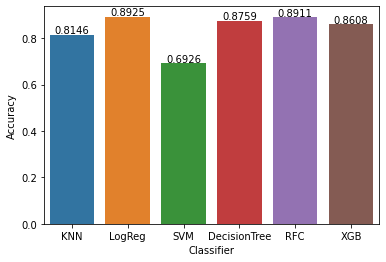

In [ ]:
axis = sns.barplot(x='Algorithm Name',y='Score',data = scores)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    

In [ ]:
scores # Baseline model Cross-validation

,Algorithm Name,Score
0,KNN,0.814574
1,LogReg,0.892496
2,SVM,0.692641
3,DecisionTree,0.875902
4,RFC,0.891053
5,XGB,0.860750


#4.2 Second Model HyperParameters Tuning:

##*1. Decision Tree Algorithm*

---



In [ ]:
dt = mymodel(DecisionTreeClassifier()) # Current Accuracy

Training Accuracy : 1.0
Testing Accuracy : 0.8153846153846154


              precision    recall  f1-score   support

           0       0.75      0.60      0.67        20
           1       0.84      0.91      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65



In [ ]:
parameters = {
    "criterion":["gini", "entropy"],
    "max_depth": list(range(1,50, 5)),
    "min_samples_leaf": list(range(1, 50, 5))
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46]},
             verbose=2)

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 26}

In [ ]:
grid.best_score_

0.86

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1, min_samples_leaf=26)

In [ ]:
dt2 = mymodel(grid.best_estimator_) # Post- HyperParameter Tuning For Decision Tree

Training Accuracy : 0.8666666666666667
Testing Accuracy : 0.7230769230769231


              precision    recall  f1-score   support

           0       0.60      0.30      0.40        20
           1       0.75      0.91      0.82        45

    accuracy                           0.72        65
   macro avg       0.67      0.61      0.61        65
weighted avg       0.70      0.72      0.69        65



##*2. SVM Tree Algorithm*

---



In [ ]:
#Parameters

parameters ={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                 'kernel': ['rbf']}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), parameters, verbose=3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid.best_score_

0.8466666666666667

In [ ]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [ ]:
svm = mymodel(grid.best_estimator_)

Training Accuracy : 0.8666666666666667
Testing Accuracy : 0.8153846153846154


              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.81      0.96      0.88        45

    accuracy                           0.82        65
   macro avg       0.82      0.73      0.75        65
weighted avg       0.82      0.82      0.80        65



##*3. Logistic Regression Algorithm*

---



In [ ]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, sol

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [ ]:
grid.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
grid.best_score_

0.8533333333333335

In [ ]:
grid.best_estimator_

LogisticRegression(C=100.0, solver='liblinear')

In [ ]:
logreg = mymodel(grid.best_estimator_)

Training Accuracy : 0.86
Testing Accuracy : 0.9076923076923077


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.93      0.93      0.93        45

    accuracy                           0.91        65
   macro avg       0.89      0.89      0.89        65
weighted avg       0.91      0.91      0.91        65



##*4. KNN Algorithm*

---



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(
    [
        ("sc", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]
)

from sklearn.model_selection import GridSearchCV
parameters = [{"knn__n_neighbors": [3, 5, 7, 9],
              "knn__weights": ["uniform", "distance"],
              "knn__leaf_size": [15, 20]}]

grid = GridSearchCV(pipe, parameters, cv=5, scoring="accuracy")
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [ ]:
grid.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

In [ ]:
grid.best_score_

0.8333333333333334

In [ ]:
grid.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15, n_neighbors=3))])

In [ ]:
knn2 = mymodel(grid.best_estimator_)

Training Accuracy : 0.9
Testing Accuracy : 0.8307692307692308


              precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.83      0.96      0.89        45

    accuracy                           0.83        65
   macro avg       0.84      0.75      0.78        65
weighted avg       0.83      0.83      0.82        65



##*5. XGBClassifier Algorithm*

---



In [ ]:
#parameters 

{'max_depth': [5,6,7,8],
'gamma': [0.01,0.001,0.001],
'min_child_weight':[1,5,10],
'learning_rate': [0.05,0.1, 0.2, 0.3],
'n_estimators':[5,10,20,100]}



{'max_depth': [5, 6, 7, 8],
 'gamma': [0.01, 0.001, 0.001],
 'min_child_weight': [1, 5, 10],
 'learning_rate': [0.05, 0.1, 0.2, 0.3],
 'n_estimators': [5, 10, 20, 100]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(XGBClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END knn__leaf_size=15, knn__n_neighbors

GridSearchCV(estimator=XGBClassifier(),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             verbose=2)

In [ ]:
grid.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

In [ ]:
grid.best_score_

0.8200000000000001

In [ ]:
grid.best_estimator_

XGBClassifier(knn__leaf_size=15, knn__n_neighbors=3, knn__weights='uniform')

In [ ]:
xgb = mymodel(grid.best_estimator_)

Training Accuracy : 0.9933333333333333
Testing Accuracy : 0.8461538461538461


              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [ ]:
knn_accuracy = cross_val_score(knn2,xtest,ytest,cv=3,scoring='accuracy')
logreg_accuracy = cross_val_score(logreg,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
svm_accuracy = cross_val_score(svm,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
dt_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
xgb_accuracy = cross_val_score(xgb,xtest,ytest,cv=3,scoring='accuracy')


In [ ]:
names = ['KNN','LogReg','SVM','DecisionTree','XGB']
score =[knn_accuracy.mean(),logreg_accuracy.mean(),svm_accuracy.mean(),dt_accuracy.mean(),xgb_accuracy.mean()]

In [ ]:
scores_2nd = pd.DataFrame({'Algorithm Name':names,'Score':score})

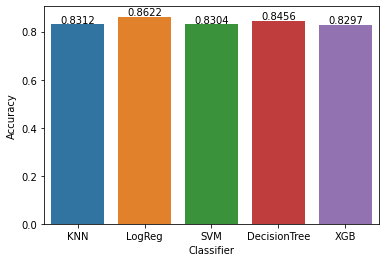

In [ ]:
axis = sns.barplot(x='Algorithm Name',y='Score',data = scores_2nd)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

In [ ]:
scores_2nd # Cross-validation post HyperParameter Tuning 

,Algorithm Name,Score
0,KNN,0.831169
1,LogReg,0.862193
2,SVM,0.830447
3,DecisionTree,0.845599
4,XGB,0.829726


In [ ]:
scores # Cross-validation for the Base model

,Algorithm Name,Score
0,KNN,0.814574
1,LogReg,0.892496
2,SVM,0.692641
3,DecisionTree,0.875902
4,RFC,0.891053
5,XGB,0.860750


In [ ]:
scores_2nd['Score'].max() 

0.8621933621933623

In [ ]:
scores['Score'].max() 

0.8924963924963926

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")

Accuracy : 0.8615384615384616
ROC : 0.8027777777777778
[[13  7]
 [ 2 43]]

              precision    recall  f1-score   support

           0       0.87      0.65      0.74        20
           1       0.86      0.96      0.91        45

    accuracy                           0.86        65
   macro avg       0.86      0.80      0.82        65
weighted avg       0.86      0.86      0.86        65



In [ ]:
train = rfc.score(xtrain, ytrain)
test = rfc.score(xtest, ytest)
    
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74        20
           1       0.86      0.96      0.91        45

    accuracy                           0.86        65
   macro avg       0.86      0.80      0.82        65
weighted avg       0.86      0.86      0.86        65



In [ ]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25]}")

Actual Values     : [1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0]
Predicted Values  : [1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print(f"Actual Values     : {ytest[25:51].values}")
print(f"Predicted Values  : {ypred[25:51]}")

Actual Values     : [1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1]
Predicted Values  : [1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0]


In [ ]:
rfc.predict_proba(xtest)

array([[0.12, 0.88],
       [0.1 , 0.9 ],
       [0.82, 0.18],
       [0.1 , 0.9 ],
       [0.71, 0.29],
       [0.08, 0.92],
       [0.58, 0.42],
       [0.1 , 0.9 ],
       [0.08, 0.92],
       [0.45, 0.55],
       [0.11, 0.89],
       [0.08, 0.92],
       [0.64, 0.36],
       [0.11, 0.89],
       [0.91, 0.09],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.2 , 0.8 ],
       [0.26, 0.74],
       [0.13, 0.87],
       [0.  , 1.  ],
       [0.12, 0.88],
       [0.09, 0.91],
       [0.4 , 0.6 ],
       [0.22, 0.78],
       [0.08, 0.92],
       [0.1 , 0.9 ],
       [0.17, 0.83],
       [0.39, 0.61],
       [0.09, 0.91],
       [0.85, 0.15],
       [0.42, 0.58],
       [0.82, 0.18],
       [0.05, 0.95],
       [0.39, 0.61],
       [0.24, 0.76],
       [0.98, 0.02],
       [0.21, 0.79],
       [0.37, 0.63],
       [0.02, 0.98],
       [0.08, 0.92],
       [0.5 , 0.5 ],
       [0.04, 0.96],
       [0.13, 0.87],
       [0.14, 0.86],
       [0.12, 0.88],
       [0.04, 0.96],
       [0.07,

In [ ]:
ypredprob = rfc.predict_proba(xtest)[:, 1]

In [ ]:
ypredprob #probability of a patient for being churn i.e for class 1

array([0.88, 0.9 , 0.18, 0.9 , 0.29, 0.92, 0.42, 0.9 , 0.92, 0.55, 0.89,
       0.92, 0.36, 0.89, 0.09, 0.59, 0.55, 0.8 , 0.74, 0.87, 1.  , 0.88,
       0.91, 0.6 , 0.78, 0.92, 0.9 , 0.83, 0.61, 0.91, 0.15, 0.58, 0.18,
       0.95, 0.61, 0.76, 0.02, 0.79, 0.63, 0.98, 0.92, 0.5 , 0.96, 0.87,
       0.86, 0.88, 0.96, 0.93, 0.96, 0.38, 0.24, 0.92, 0.31, 0.83, 0.38,
       0.99, 0.27, 1.  , 0.79, 0.87, 0.94, 0.99, 0.84, 0.99, 0.2 ])

In [ ]:
from sklearn.preprocessing import binarize

In [ ]:
ypred = binarize([ypredprob], threshold=0.3)[0]

In [ ]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25].astype(int)}")

Actual Values     : [1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0]
Predicted Values  : [1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")

Accuracy : 0.8
ROC : 0.6888888888888889
[[ 8 12]
 [ 1 44]]

              precision    recall  f1-score   support

           0       0.89      0.40      0.55        20
           1       0.79      0.98      0.87        45

    accuracy                           0.80        65
   macro avg       0.84      0.69      0.71        65
weighted avg       0.82      0.80      0.77        65



In [ ]:
train = rfc.score(xtrain, ytrain)
test = rfc.score(xtest, ytest)

print(f"Training Accuracy - : {train}\nTesting Accuracy -: {test}")

Training Accuracy - : 1.0
Testing Accuracy -: 0.8615384615384616


In [ ]:
from sklearn.metrics import roc_curve

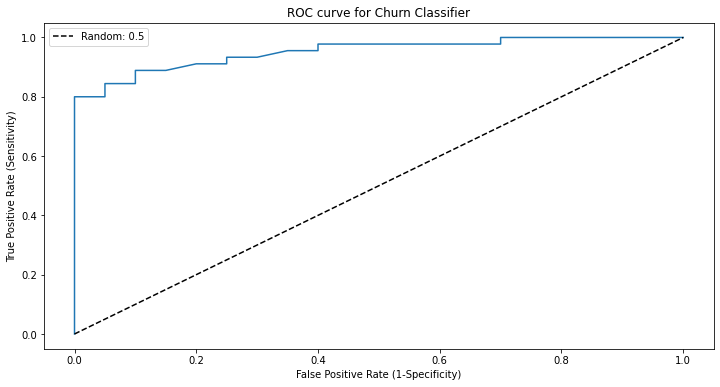

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)

fpr, tpr, thres = roc_curve(ytest, ypredprob)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')

plt.title("ROC curve for Churn Classifier")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc='best')

#plt.grid()
plt.show()           

# **5.Conlusion**

Thus, the Top 5 Features affecting salary we identified are:

gender -> Gender

degree_t -> Under Graduation(Degree type)- Field of degree education

mba_p -> MBA percentage

hsc_s -> Specialization in Higher Secondary Education

etest_p -> Employability test percentage

(Same as with Sequential Feature Selection with mlxtend considering R2)